In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Visualize each Disease consists of how many symptom

The median number of symptoms across all diseases is: 14.0


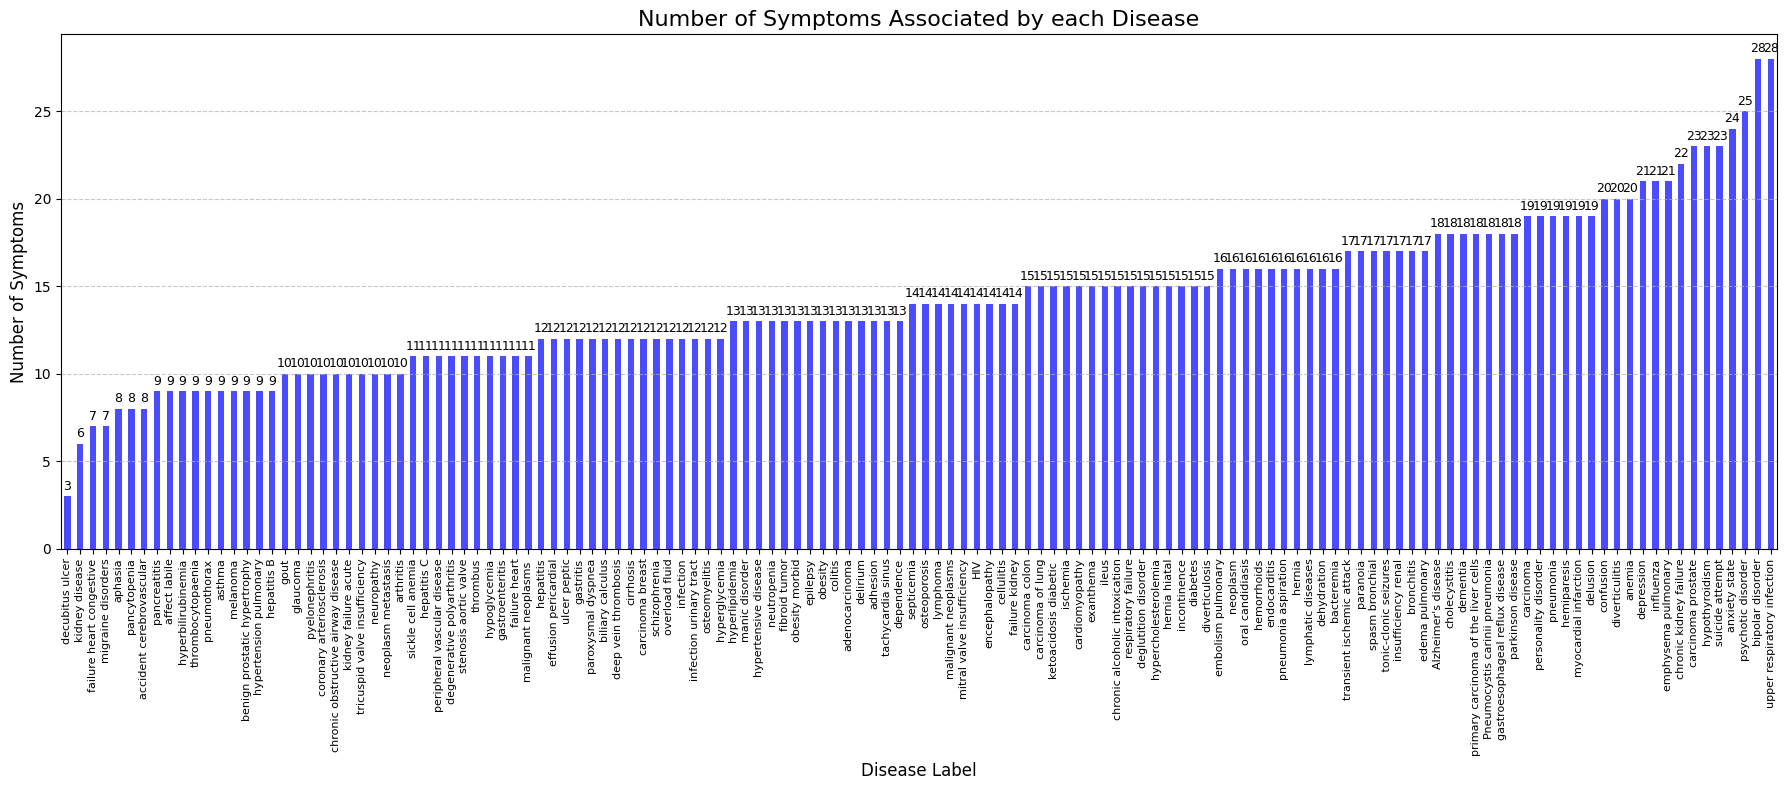

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/P2/T1/Dataset/rawdata.csv')

# Calculate the number of symptoms associated with each disease
data['symptom_count'] = data.iloc[:, :-1].sum(axis=1)  # Sum the 1s in symptom columns (assumes last column is disease_label)
disease_symptom_counts = data.groupby('disease_label')['symptom_count'].mean()

# Visualize the number of symptoms per disease
plt.figure(figsize=(18, 8))
bars = disease_symptom_counts.sort_values().plot(kind='bar', color='blue', alpha=0.7)

# Add the number of symptoms on top of each bar
for index, value in enumerate(disease_symptom_counts.sort_values()):
    plt.text(index, value + 0.2, f'{int(value)}', ha='center', va='bottom', fontsize=9)

# Calculate the median number of symptoms
median_symptoms = disease_symptom_counts.median()

# Print the result
print(f"The median number of symptoms across all diseases is: {median_symptoms}")

# Customize the plot
plt.title("Number of Symptoms Associated by each Disease", fontsize=16)
plt.xlabel("Disease Label", fontsize=12)
plt.ylabel("Number of Symptoms", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


# 1.0 Remove Outlier

Filtered dataset saved.
The total number of disease: 59


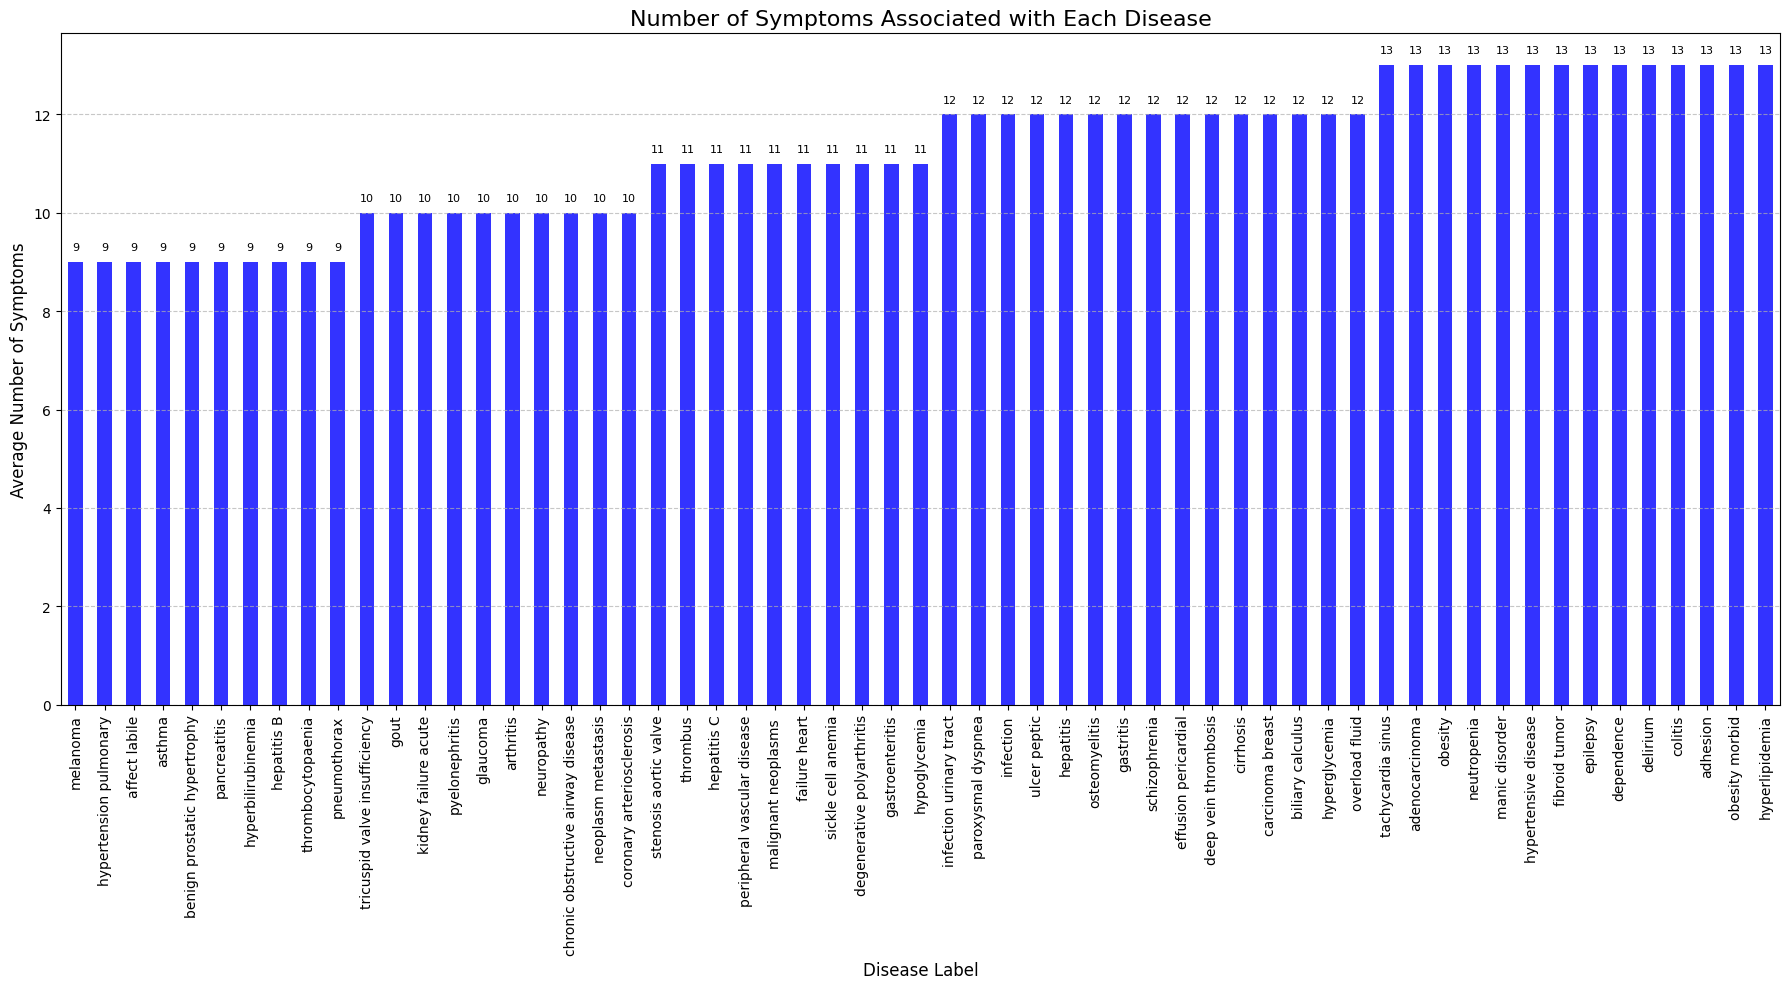

In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/P2/T1/Dataset/rawdata.csv')

# Calculate the number of symptoms associated with each disease
data['symptom_count'] = data.iloc[:, :-1].sum(axis=1)  # Sum the symptom columns (assume last column is disease_label)

# Filter out diseases with fewer than 10 symptoms or more than 13 symptoms
filtered_data = data[(data['symptom_count'] > 8) & (data['symptom_count'] <= 13)]

# Drop the 'symptom_count' column (optional)
filtered_data = filtered_data.drop(columns=['symptom_count'])

# Save the filtered dataset
filtered_data.to_csv('/content/drive/MyDrive/P2/T1/Dataset/1no_outlier.csv', index=False)

print("Filtered dataset saved.")

# Calculate the number of symptoms associated with each disease
filtered_data['symptom_count'] = filtered_data.iloc[:, :-1].sum(axis=1)  # Count the 1s in symptom columns for each row
disease_symptom_counts = filtered_data.groupby('disease_label')['symptom_count'].mean()

# Visualize the number of symptoms associated with each disease
plt.figure(figsize=(18, 10))
bars = disease_symptom_counts.sort_values().plot(kind='bar', color='blue', alpha=0.8)

# Add numbers on top of each bar
for i, count in enumerate(disease_symptom_counts.sort_values()):
    plt.text(i, count + 0.2, f'{count:.0f}', ha='center', va='bottom', fontsize=8)

# Customize the plot
plt.title('Number of Symptoms Associated with Each Disease', fontsize=16)
plt.xlabel('Disease Label', fontsize=12)
plt.ylabel('Average Number of Symptoms', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

print("The total number of disease:", len(disease_symptom_counts))
# Show the plot
plt.show()

# 2.0 Remove "0" Symptoms Column

In [7]:
import pandas as pd

# Load your dataset
data_latest = pd.read_csv("/content/drive/MyDrive/P2/T1/Dataset/1no_outlier.csv")  # Replace with your file path

# Identify columns with all zero values
zero_columns_latest = data_latest.columns[(data_latest == 0).all()]

# Display the number of such columns and their names
print(f"Number of columns with all zeros: {len(zero_columns_latest)}")
if len(zero_columns_latest) > 0:
    print("Columns with all zeros:")
    print(zero_columns_latest.tolist())
else:
    print("No columns with all zeros.")


Number of columns with all zeros: 135
Columns with all zeros:
['ambidexterity', 'stinging sensation', 'noisy respiration', 'pallor', 'feces in rectum', 'sneeze', 'welt', 'phonophobia', 'fear of falling', 'rhonchus', 'anosmia', 'adverse effect', 'hacking cough', "Heberden's node", 'hyperventilation', 'neologism', 'hemianopsia homonymous', 'mydriasis', 'pin-point pupils', 'groggy', 'frail', 'asymptomatic', 'history of - blackout', 'hoard', 'side pain', 'dysdiadochokinesia', 'bradykinesia', 'paralyse', 'hirsutism', 'achalasia', 'rambling speech', 'rapid shallow breathing', 'indifferent mood', 'no status change', 'nasal discharge present', 'lightheadedness', 'titubation', 'focal seizures', 'flushing', 'passed stones', 'excruciating pain', 'nightmare', 'terrify', 'pulse absent', 'scratch marks', 'vision blurred', 'gravida 10', 'st segment elevation', 'dizzy spells', 'absences finding', 'nasal flaring', 'abdomen acute', 'motor retardation', 'hypoproteinemia', 'clumsiness', 'macule', 'hepatom

In [8]:
# Drop the columns with all zero values
columns_to_drop = zero_columns_latest

# Drop the columns from the DataFrame
data_cleaned = data_latest.drop(columns=columns_to_drop)

# Save the cleaned dataset
data_cleaned.to_csv("/content/drive/MyDrive/P2/T1/Dataset/2no_zero.csv", index=False)

# Print confirmation
print(f"Removed {len(columns_to_drop)} columns: {columns_to_drop}")
print("Cleaned dataset saved to 'cleaned_dataset.csv'.")

Removed 135 columns: Index(['ambidexterity', 'stinging sensation', 'noisy respiration', 'pallor',
       'feces in rectum', 'sneeze', 'welt', 'phonophobia', 'fear of falling',
       'rhonchus',
       ...
       'dullness', 'gasping for breath', 'disturbed family',
       'painful swallowing', 'poor dentition', 'low back pain',
       'catching breath', 'pulsus paradoxus', 'Murphy's sign',
       'air fluid level'],
      dtype='object', length=135)
Cleaned dataset saved to 'cleaned_dataset.csv'.


In [9]:
import pandas as pd

# Load your dataset
data_latest = pd.read_csv("/content/drive/MyDrive/P2/T1/Dataset/2no_zero.csv")

# Identify columns with all zero values
zero_columns_latest = data_latest.columns[(data_latest == 0).all()]

# Display the number of such columns and their names
print(f"Number of columns with all zeros: {len(zero_columns_latest)}")
if len(zero_columns_latest) > 0:
    print("Columns with all zeros:")
    print(zero_columns_latest.tolist())
else:
    print("No columns with all zeros.")

Number of columns with all zeros: 0
No columns with all zeros.


# List out Unique Diseases

In [10]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/P2/T1/Dataset/2no_zero.csv')
print("disease_list: ", df['disease_label'].unique())

disease_list:  ['hypertensive disease' 'coronary arteriosclerosis' 'asthma' 'infection'
 'infection urinary tract' 'chronic obstructive airway disease'
 'degenerative polyarthritis' 'malignant neoplasms '
 'deep vein thrombosis' 'epilepsy' 'hepatitis C'
 'peripheral vascular disease' 'hyperlipidemia' 'obesity' 'cirrhosis'
 'benign prostatic hypertrophy' 'kidney failure acute' 'arthritis'
 'adenocarcinoma' 'pancreatitis' 'paroxysmal dyspnea'
 'stenosis aortic valve' 'carcinoma breast' 'schizophrenia'
 'overload fluid' 'ulcer peptic' 'osteomyelitis' 'gastritis'
 'sickle cell anemia' 'failure heart' 'hepatitis' 'hypertension pulmonary'
 'gout' 'thrombocytopaenia' 'hypoglycemia' 'colitis' 'hepatitis B'
 'hyperglycemia' 'tricuspid valve insufficiency' 'neuropathy'
 'fibroid tumor' 'glaucoma' 'neoplasm metastasis' 'melanoma'
 'gastroenteritis' 'manic disorder' 'obesity morbid' 'pyelonephritis'
 'effusion pericardial' 'pneumothorax' 'delirium' 'neutropenia'
 'hyperbilirubinemia' 'dependence' 

In [12]:
# Count the number of columns
num_columns = len(df.columns)

print(f"Total number of columns/symptoms: {num_columns}")

Total number of columns/symptoms: 272
